<div style=" background-color: RGB(200,200,10);" >
<h1 style="margin: auto; padding: 20px 0; color:#fff; text-align: center"> Projet "Divvy Bike Chicago: Année 2018 "
</h2>
<h3 style="margin: auto; padding: 20px 0; color:#fff; text-align: center">Partie 1: Traitement et test
</h3>
</div>

<div style="background-color: RGB(200,200,20) ; ">
<h2 style="margin: auto; padding: 20px; color:#fff; "> Etape 1 - Importation des librairies et chargement des données</a> 
</div>

<div style="border: 5px solid RGB(200,200,20);" >
<h3 style="margin: auto; padding: 20px; color: RGB(200,200,20); ">1.2 - Importation des librairies </h3>
</div>

In [16]:
# Importation des librairies Pandas, Matplotlib et Numpy
import pandas as pd
import matplotlib.pyplot as plt

import plotly.express as px
import statsmodels.api as sm
import statsmodels.formula.api as smf
from scipy.stats import t, shapiro
import scipy.stats as st
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

from sklearn.preprocessing import StandardScaler
import numpy as np
import seaborn as sns

<div style="border: 5px solid RGB(200,200,0);" >
<h3 style="margin: auto; padding: 20px; color: RGB(200,200,0); ">1.2 - Chargement des fichiers CSV </h3>
</div>

In [17]:
#Importation du fichier "Divvy_Trips_2018_Q1.xlsx"
Trim1 = pd.read_excel("Divvy_Trips_2018_Q1.xlsx")
Trim1.head(5)

,trip_id,start_time,end_time,bikeid,tripduration,from_station_id,from_station_name,to_station_id,to_station_name,usertype,gender,birthyear
0,17536702,2018-01-01 00:12:00,2018-01-01 00:17:00,3304,323.0,69,Damen Ave & Pierce Ave,159,Claremont Ave & Hirsch St,Subscriber,Male,1988.0
1,17536703,2018-01-01 00:41:00,2018-01-01 00:47:00,5367,377.0,253,Winthrop Ave & Lawrence Ave,325,Clark St & Winnemac Ave (Temp),Subscriber,Male,1984.0
2,17536704,2018-01-01 00:44:00,2018-01-01 01:33:00,4599,"2,904.0",98,LaSalle St & Washington St,509,Troy St & North Ave,Subscriber,Male,1989.0
3,17536705,2018-01-01 00:53:00,2018-01-01 01:05:00,2302,747.0,125,Rush St & Hubbard St,364,Larrabee St & Oak St,Subscriber,Male,1983.0
4,17536706,2018-01-01 00:53:00,2018-01-01 00:56:00,3696,183.0,129,Blue Island Ave & 18th St,205,Paulina St & 18th St,Subscriber,Male,1989.0


In [18]:
#Importation du fichier "Divvy_Trips_2018_Q1.xlsx"
Trim2 = pd.read_csv("Divvy_Trips_2018_Q2.csv")
Trim2.head(5)

,trip_id,start_time,end_time,bikeid,tripduration,from_station_id,from_station_name,to_station_id,to_station_name,usertype,gender,birthyear
0,18000527,2018-04-01 00:04:44,2018-04-01 00:13:03,3819,499.0,22,May St & Taylor St,171,May St & Cullerton St,Subscriber,Male,1994.0
1,18000528,2018-04-01 00:06:42,2018-04-01 00:27:07,5000,"1,225.0",157,Lake Shore Dr & Wellington Ave,190,Southport Ave & Wrightwood Ave,Subscriber,Male,1965.0
2,18000529,2018-04-01 00:07:19,2018-04-01 00:23:19,5165,960.0,106,State St & Pearson St,106,State St & Pearson St,Customer,NaN,NaN
3,18000530,2018-04-01 00:07:33,2018-04-01 00:14:47,3851,434.0,241,Morgan St & Polk St,171,May St & Cullerton St,Subscriber,Male,1998.0
4,18000531,2018-04-01 00:10:23,2018-04-01 00:22:12,5065,709.0,228,Damen Ave & Melrose Ave,219,Damen Ave & Cortland St,Subscriber,Male,1983.0


In [19]:
#Importation du fichier "Divvy_Trips_2018_Q1.xlsx"
Trim3 = pd.read_csv("Divvy_Trips_2018_Q3.csv")
Trim3.head(5)

,trip_id,start_time,end_time,bikeid,tripduration,from_station_id,from_station_name,to_station_id,to_station_name,usertype,gender,birthyear
0,19244622,2018-07-01 00:00:03,2018-07-01 23:56:11,5429,"86,168.0",140,Dearborn Pkwy & Delaware Pl,106,State St & Pearson St,Customer,NaN,NaN
1,19244623,2018-07-01 00:00:13,2018-07-01 00:06:39,93,386.0,153,Southport Ave & Wellington Ave,250,Ashland Ave & Wellington Ave,Subscriber,Male,1986.0
2,19244624,2018-07-01 00:00:15,2018-07-01 00:23:26,2461,"1,391.0",76,Lake Shore Dr & Monroe St,301,Clark St & Schiller St,Subscriber,Female,1987.0
3,19244625,2018-07-01 00:00:25,2018-07-01 00:23:31,2991,"1,386.0",76,Lake Shore Dr & Monroe St,301,Clark St & Schiller St,Subscriber,Male,1986.0
4,19244626,2018-07-01 00:00:27,2018-07-01 00:11:23,2851,656.0,60,Dayton St & North Ave,166,Ashland Ave & Wrightwood Ave,Subscriber,Male,1961.0


<div style="border: 5px solid RGB(200,200,20);" >
<h3 style="margin: auto; padding: 20px; color: RGB(200,200,20); ">1.3 - Nettoyage des données </h3>
</div>

## **<span style="color:red"> Analyse du 1er trimestre <span>**

In [5]:
#Information sur le dataframedu nombre de colonnes et de lignes, du type de variable et du nombre de variables non-nulles.
Trim1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 387145 entries, 0 to 387144
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   trip_id            387145 non-null  int64         
 1   start_time         387145 non-null  datetime64[ns]
 2   end_time           387145 non-null  datetime64[ns]
 3   bikeid             387145 non-null  int64         
 4   tripduration       387145 non-null  object        
 5   from_station_id    387145 non-null  int64         
 6   from_station_name  387145 non-null  object        
 7   to_station_id      387145 non-null  int64         
 8   to_station_name    387145 non-null  object        
 9   usertype           387145 non-null  object        
 10  gender             364652 non-null  object        
 11  birthyear          364823 non-null  float64       
dtypes: datetime64[ns](2), float64(1), int64(4), object(5)
memory usage: 35.4+ MB


**<span style="color:blue"> Il manque des données sur l'année de naissance et le genre des utilisateurs. La variable trip_duration doit être en format numérique <span>**

In [6]:
Trim1.describe()

,trip_id,bikeid,from_station_id,to_station_id,birthyear
count,3.871450e+05,387145.000000,387145.000000,387145.000000,364823.000000
mean,1.777132e+07,3675.977117,183.606711,183.503230,1980.635889
std,1.333592e+05,1968.413104,135.526115,135.525989,11.211539
min,1.753670e+07,1.000000,2.000000,2.000000,1899.000000
25%,1.765498e+07,1958.000000,74.000000,74.000000,1974.000000
50%,1.777287e+07,3851.000000,158.000000,157.000000,1984.000000
75%,1.788721e+07,5518.000000,276.000000,277.000000,1989.000000
max,1.800053e+07,6471.000000,627.000000,627.000000,2003.000000


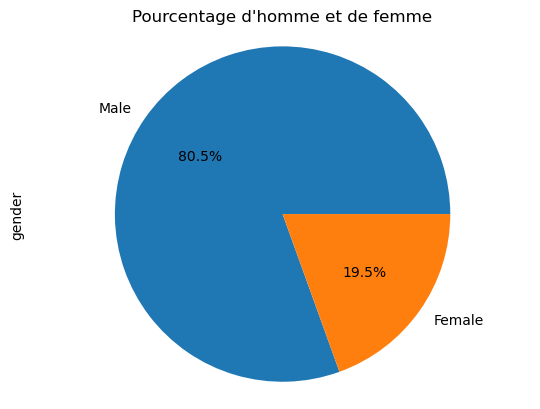

In [7]:
Trim1["gender"].value_counts().plot(kind='pie', subplots=True,autopct='%1.1f%%')
# Cette ligne assure que le pie chart est un cercle plutôt qu'une éllipse
plt.title("Pourcentage d'homme et de femme")
plt.axis('equal') 
plt.show() # Affiche le graphique

In [8]:
#Dataframe "GenreManquantTrim1" pour analyser les personnes qui n'ont pas renseignées leur genre au 1er trimestre
GenreManquantTrim1 =Trim1.loc[Trim1['gender'].isna(),:]
GenreManquantTrim1

,trip_id,start_time,end_time,bikeid,tripduration,from_station_id,from_station_name,to_station_id,to_station_name,usertype,gender,birthyear
8,17536710,2018-01-01 01:07:00,2018-01-01 01:31:00,1920,"1,481.0",99,Lake Shore Dr & Ohio St,99,Lake Shore Dr & Ohio St,Customer,NaN,NaN
9,17536711,2018-01-01 01:07:00,2018-01-06 10:04:00,4783,"464,168.0",99,Lake Shore Dr & Ohio St,99,Lake Shore Dr & Ohio St,Customer,NaN,NaN
10,17536712,2018-01-01 01:08:00,2018-01-01 01:31:00,3881,"1,361.0",99,Lake Shore Dr & Ohio St,99,Lake Shore Dr & Ohio St,Customer,NaN,NaN
110,17536828,2018-01-01 11:54:00,2018-01-01 12:46:00,4916,"3,133.0",173,Mies van der Rohe Way & Chicago Ave,3,Shedd Aquarium,Customer,NaN,NaN
111,17536829,2018-01-01 11:54:00,2018-01-01 12:47:00,4691,"3,158.0",173,Mies van der Rohe Way & Chicago Ave,3,Shedd Aquarium,Customer,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
387042,18000422,2018-03-31 22:12:00,2018-03-31 23:07:00,4854,"3,279.0",338,Calumet Ave & 18th St,350,Ashland Ave & Chicago Ave,Customer,NaN,NaN
387044,18000424,2018-03-31 22:12:00,2018-03-31 23:07:00,3721,"3,261.0",338,Calumet Ave & 18th St,350,Ashland Ave & Chicago Ave,Customer,NaN,NaN
387090,18000471,2018-03-31 22:54:00,2018-03-31 23:41:00,3470,"2,849.0",21,Aberdeen St & Jackson Blvd,80,Aberdeen St & Monroe St,Customer,NaN,NaN
387104,18000485,2018-03-31 23:06:00,2018-03-31 23:23:00,5243,"1,035.0",24,Fairbanks Ct & Grand Ave,106,State St & Pearson St,Customer,NaN,NaN


In [9]:
GenreManquantTrim1.describe()

,trip_id,bikeid,from_station_id,to_station_id,birthyear
count,2.249300e+04,22493.000000,22493.000000,22493.000000,175.000000
mean,1.784118e+07,3517.874850,157.592407,156.882097,1974.497143
std,1.228016e+05,1922.820181,143.082631,140.938476,13.898596
min,1.753671e+07,1.000000,2.000000,2.000000,1953.000000
25%,1.776498e+07,1839.000000,43.000000,43.000000,1968.000000
50%,1.786409e+07,3676.000000,99.000000,99.000000,1980.000000
75%,1.794505e+07,5241.000000,249.000000,240.000000,1986.000000
max,1.800051e+07,6471.000000,627.000000,627.000000,1994.000000


**<span style="color:blue"> Il y a 175 années de naissances renseignées parmi les 22 493 personnes qui n'ont pas indiqués leur genre. <span>**

In [10]:
#Nombre de femmes et d'hommes
GenreManquantTrim1['gender'].value_counts()

Series([], Name: gender, dtype: int64)

In [11]:
NaissanceManquantes_T1=Trim1.loc[Trim1['birthyear'].isna(),:]
NaissanceManquantes_T1

,trip_id,start_time,end_time,bikeid,tripduration,from_station_id,from_station_name,to_station_id,to_station_name,usertype,gender,birthyear
8,17536710,2018-01-01 01:07:00,2018-01-01 01:31:00,1920,"1,481.0",99,Lake Shore Dr & Ohio St,99,Lake Shore Dr & Ohio St,Customer,NaN,NaN
9,17536711,2018-01-01 01:07:00,2018-01-06 10:04:00,4783,"464,168.0",99,Lake Shore Dr & Ohio St,99,Lake Shore Dr & Ohio St,Customer,NaN,NaN
10,17536712,2018-01-01 01:08:00,2018-01-01 01:31:00,3881,"1,361.0",99,Lake Shore Dr & Ohio St,99,Lake Shore Dr & Ohio St,Customer,NaN,NaN
110,17536828,2018-01-01 11:54:00,2018-01-01 12:46:00,4916,"3,133.0",173,Mies van der Rohe Way & Chicago Ave,3,Shedd Aquarium,Customer,NaN,NaN
111,17536829,2018-01-01 11:54:00,2018-01-01 12:47:00,4691,"3,158.0",173,Mies van der Rohe Way & Chicago Ave,3,Shedd Aquarium,Customer,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
387042,18000422,2018-03-31 22:12:00,2018-03-31 23:07:00,4854,"3,279.0",338,Calumet Ave & 18th St,350,Ashland Ave & Chicago Ave,Customer,NaN,NaN
387044,18000424,2018-03-31 22:12:00,2018-03-31 23:07:00,3721,"3,261.0",338,Calumet Ave & 18th St,350,Ashland Ave & Chicago Ave,Customer,NaN,NaN
387090,18000471,2018-03-31 22:54:00,2018-03-31 23:41:00,3470,"2,849.0",21,Aberdeen St & Jackson Blvd,80,Aberdeen St & Monroe St,Customer,NaN,NaN
387104,18000485,2018-03-31 23:06:00,2018-03-31 23:23:00,5243,"1,035.0",24,Fairbanks Ct & Grand Ave,106,State St & Pearson St,Customer,NaN,NaN


In [12]:
ValeursManquantes_T1.describe()

,trip_id,bikeid,from_station_id,to_station_id,birthyear
count,2.232200e+04,22322.000000,22322.000000,22322.000000,0.0
mean,1.784095e+07,3516.697070,156.934056,156.223188,NaN
std,1.228302e+05,1923.329766,142.918474,140.662488,NaN
min,1.753671e+07,1.000000,2.000000,2.000000,NaN
25%,1.776490e+07,1835.000000,43.000000,43.000000,NaN
50%,1.786392e+07,3676.000000,99.000000,99.000000,NaN
75%,1.794482e+07,5242.750000,249.000000,234.000000,NaN
max,1.800051e+07,6471.000000,627.000000,627.000000,NaN


In [13]:
ValeursManquantes_T1['gender'].value_counts()

Female    4
Name: gender, dtype: int64

In [ ]:
SansValManquantes_T1= Trim

 **<span style="color:red"> Analyse du 1er trimestre sans les données manquantes  <span>**

## **<span style="color:red"> Analyse du 2ème trimestre <span>**

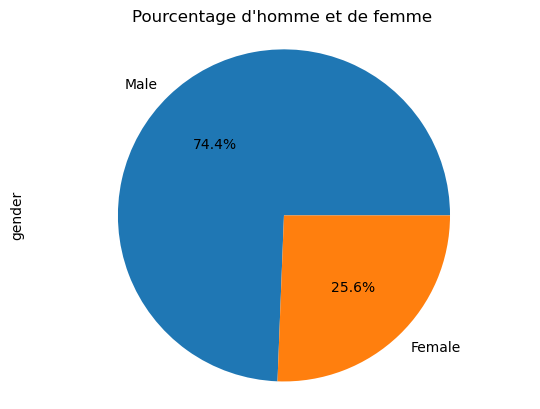

In [14]:
Trim2["gender"].value_counts().plot(kind='pie', subplots=True,autopct='%1.1f%%')
# Cette ligne assure que le pie chart est un cercle plutôt qu'une éllipse
plt.title("Pourcentage d'homme et de femme")
plt.axis('equal') 
plt.show() # Affiche le graphique

## **<span style="color:red"> Analyse du 3ème trimestre <span>**

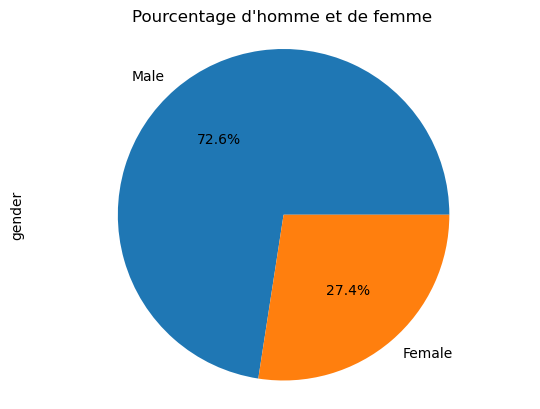

In [15]:
Trim3["gender"].value_counts().plot(kind='pie', subplots=True,autopct='%1.1f%%')
# Cette ligne assure que le pie chart est un cercle plutôt qu'une éllipse
plt.title("Pourcentage d'homme et de femme")
plt.axis('equal') 
plt.show() # Affiche le graphique

<div style="background-color: RGB(200,200,20);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 2 - Analyse exploratoire des fichiers</h2>
</div>